# Convolutional Neural Networks

## Concept: *Edge Detection*

Perfect for computer vision, because enhancing features like edges helps the computer distinguish one item from another. 

The amount of information needed is much less, because you'll train only on the highlighted features.

## Technique

The information going to the dense layers is more focused and possibly more accurate.

* Add some layers to do convolution.
* Then pass it to the dense layers.

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.0


## Data Preprocessing

### Reshape features

Training features need to be reshaped as **the first convolution expects a single tensor containing everything**. 

So, instead of 60,000 28x28x1 items in a list, you have a single 4D list that is 60,000x28x28x1

In [ ]:
# Get data
mnist = tf.keras.datasets.fashion_mnist
(X_trn, y_trn), (X_tst, y_tst) = mnist.load_data()
print("Data fetched")
print("X_trn: ", X_trn.shape)
print("X_tst: ", X_tst.shape)

# Reshape features
X_trn = X_trn.reshape(60000, 28, 28, 1)
X_tst = X_tst.reshape(10000, 28, 28, 1)
print("Data features reshaped")
print("X_trn: ", X_trn.shape)
print("X_tst: ", X_tst.shape)

# Normalize features
X_trn = X_trn / 255.0
X_tst = X_tst / 255.0
print("Data features normalized")

4423680/4422102 [==============================] - 0s 0us/step
Data fetched
X_trn:  (60000, 28, 28)
X_tst:  (10000, 28, 28)
Data features reshaped
X_trn:  (60000, 28, 28, 1)
X_tst:  (10000, 28, 28, 1)
Data features normalized


## Define Model

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units=128, activation='relu'),
  tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
    optimizer='adam'
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

## Train Model

In [ ]:
class myCallback95(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached 95% accuracy so terminating training!")
      self.model.stop_training = True

callback = myCallback95()

In [ ]:
model.fit(x=X_trn, y=y_trn, epochs=20, callbacks=[callback])

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6070 - accuracy: 0.7857
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3068 - accuracy: 0.8886
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2508 - accuracy: 0.9078
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2132 - accuracy: 0.9203
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1874 - accuracy: 0.9304
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1672 - accuracy: 0.9361
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1459 - accuracy: 0.9457
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1244 - accuracy: 0.9535

Reached 95% accuracy so terminating training!


## Evaluate Model

In [ ]:
test_loss, test_accuracy = model.evaluate(X_tst, y_tst)
print ('Test loss: {}, Test accuracy: {}'.format(test_loss, test_accuracy*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.2621 - accuracy: 0.9130
Test loss: 0.2620622217655182, Test accuracy: 91.29999876022339


## Visualize Convolutions and Pooling

In [ ]:
print('First 100 labels')
print(y_tst[:100])

First 100 labels
[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


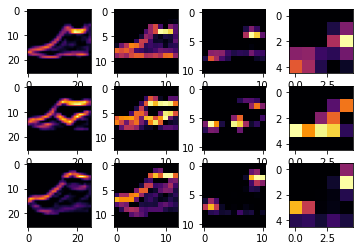

In [ ]:
# Pick 3 images with same label (9)
IMG1 = 0
IMG2 = 23
IMG3 = 28

# Check the image after some convolutions
CONV_NO = 8

# Get each layer's output from the trained model
layer_outputs = [layer.output for layer in model.layers] 

# Prepare an activation model with the trained model layers
activation_model = tf.keras.models.Model(
  inputs = model.input,
  outputs = layer_outputs
)

# Visualize the three images' convolution
import matplotlib.pyplot as plt
f, ax = plt.subplots(3, 4)

for x in range(0, 4):
  f1 = activation_model.predict(X_tst[IMG1].reshape(1, 28, 28, 1))[x]
  ax[0, x].imshow(f1[0, :, :, CONV_NO], cmap='inferno')
  ax[0, x].grid(False)
  
  f2 = activation_model.predict(X_tst[IMG2].reshape(1, 28, 28, 1))[x]
  ax[1, x].imshow(f2[0, :, :, CONV_NO], cmap='inferno')
  ax[1, x].grid(False)
  
  f3 = activation_model.predict(X_tst[IMG3].reshape(1, 28, 28, 1))[x]
  ax[2, x].imshow(f3[0, :, :, CONV_NO], cmap='inferno')
  ax[2, x].grid(False)

## Further Experimentation

In [ ]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units=128, activation='relu'),
  tf.keras.layers.Dense(units=10, activation='softmax')
])

model1.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

model1.summary()

model1.fit(x=X_trn, y=y_trn, epochs=20, callbacks=[callback])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        9280      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [ ]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units=128, activation='relu'),
  tf.keras.layers.Dense(units=10, activation='softmax')
])

model2.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

model2.summary()

model2.fit(x=X_trn, y=y_trn, epochs=20, callbacks=[callback])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2704)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               346240    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 347,690
Trainable params: 347,690
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5754 - accuracy: 0.7985
Epoch 2/20
1

In [ ]:
model3 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units=128, activation='relu'),
  tf.keras.layers.Dense(units=10, activation='softmax')
])

model3.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

model3.summary()

model3.fit(x=X_trn, y=y_trn, epochs=20, callbacks=[callback])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        9280      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 16)          9232      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 1, 1, 16)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 16)               